In [ ]:
# INTRODUCTION TO REGRESSION

In [ ]:
# Supervised machine learning
'''
Regression - continuous value
& Classification - discrete value

e.g prices of houses - Regression
e.g slaries of level1 workers based on year of experience - regression

linear regression: model linear relationship between features and targets
y = mx+c
m- slope
x-independent variable
y-dependent
b- intercept
'''

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# create a list with 6 rows, 2 column

data = [[-1,-1], [1,2], [2,3], [4,3], [6,5], [7,8]]
data

[[-1, -1], [1, 2], [2, 3], [4, 3], [6, 5], [7, 8]]

In [9]:
dataset = pd.DataFrame(data, columns = ['x', 'y'])

In [10]:
dataset

,x,y
0,-1,-1
1,1,2
2,2,3
3,4,3
4,6,5
5,7,8


In [11]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [12]:
x.shape

(6, 1)

In [13]:
y.shape

(6,)

In [15]:
type(x)

numpy.ndarray

In [16]:
type(y)

numpy.ndarray

In [ ]:
stack_data 

In [ ]:
# Model training

In [17]:
# fitting simple linear regression to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [18]:
regressor.score(x, y)

0.8981055055474146

In [21]:
regressor.intercept_

0.3807829181494653

In [22]:
print(regressor.intercept_)

0.3807829181494653


In [23]:
regressor.coef_

array([0.93238434])

In [24]:
cor = dataset.corr()
print(cor)

          x         y
x  1.000000  0.947684
y  0.947684  1.000000


In [26]:
dataset.corr()

,x,y
x,1.000000,0.947684
y,0.947684,1.000000


In [27]:
# model testing
'''
How to know if our model understannds
'''

'\nHow to know if our model understands\n\n'

In [28]:
y_pred = regressor.predict(x)
# note: store the result  in y_pred

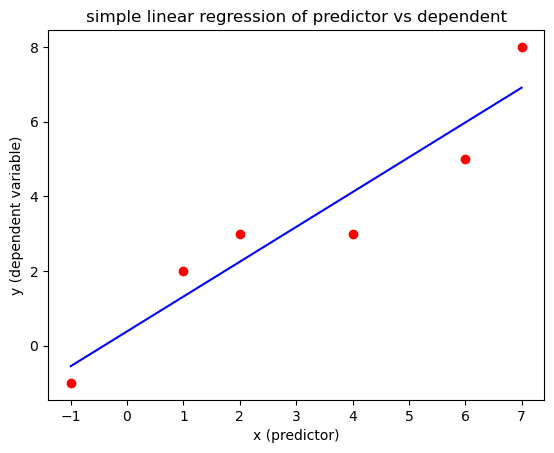

In [29]:
# visualizing the result
plt.scatter(x, y, color = 'red')

plt.plot(x, regressor.predict(x), color = 'blue')

plt.title('simple linear regression of predictor vs dependent')
plt.xlabel('x (predictor)')
plt.ylabel('y (dependent variable)')
plt.show()

In [ ]:
# linear regression is not best model for this scenerio, what do i do?

In [30]:
dataset['yhat'] = y_pred

dataset

,x,y,yhat
0,-1,-1,-0.551601
1,1,2,1.313167
2,2,3,2.245552
3,4,3,4.110320
4,6,5,5.975089
5,7,8,6.907473


In [ ]:
# Evaluate metrics for regression model

In [33]:
result = dataset[['y', 'yhat']]

In [35]:
n = len(dataset)

result['error'] = dataset['y'].subtract(dataset['yhat'])

print(result)

cost_function = abs(result['error']).sum()

Mean_Absolute_Error = cost_function / n

print()

print(cost_function)
print(Mean_Absolute_Error)

   y      yhat     error
0 -1 -0.551601 -0.448399
1  2  1.313167  0.686833
2  3  2.245552  0.754448
3  3  4.110320 -1.110320
4  5  5.975089 -0.975089
5  8  6.907473  1.092527

5.067615658362989
0.8446026097271648


In [ ]:
#ASSIGNMENT RMS WITHOUT SKLEARN

In [36]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.8446026097271648
Mean Squared Error: 0.7698695136417557
Root Mean Squared Error: 0.8774220840859636


In [37]:
# since there was no linear relationship, let us use polynomial regression

In [42]:
# importing polynomial feature

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)

In [44]:
regressor_2 = LinearRegression()
regressor_2.fit(x_poly, y)

LinearRegression()

In [45]:
regressor_2.score(x_poly,y)

0.99828352180937

In [46]:
poly_pred = regressor_2.predict(poly_reg.fit_transform(x))

In [47]:
print('regression intercept=', regressor_2.intercept_)

regression intercept= 0.8507269789982872


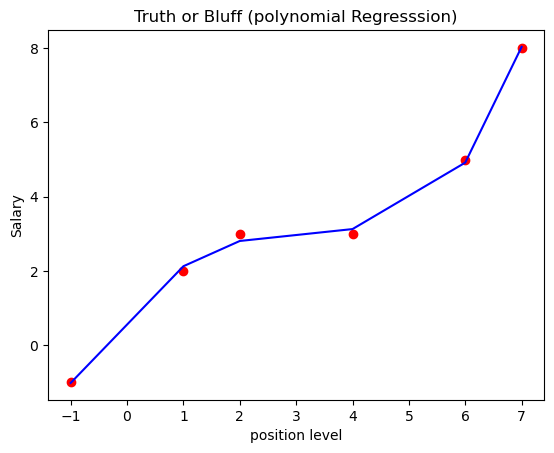

In [48]:
# visualizing the polynomial regression model result
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (polynomial Regresssion)')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()

In [49]:
dataset['yhat_poly'] = poly_pred

dataset

,x,y,yhat,yhat_poly
0,-1,-1,-0.551601,-1.013732
1,1,2,1.313167,2.128164
2,2,3,2.245552,2.807754
3,4,3,4.110320,3.128164
4,6,5,5.975089,4.917609
5,7,8,6.907473,8.032041


In [ ]:
# classification
#binary multi-class & multilabel-2 label at once

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
data = pd.read_csv('C:/Users/HP/Desktop/DSN AI_Everyday 2024/INTERMEDIATE/Regression task- Day 4-20240229T094839Z-001/Regression task- Day 4/Social_Network_Ads.csv', delimiter= ',')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [6]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

#pre-processing data

In [7]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

data['Gender']=le.fit_transform(data['Gender'])

In [8]:
data['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [9]:
data.shape

(400, 5)

# EXPLOARATORY ANALYSIS

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [11]:
# employee that did not buy and those that bought

left= data.groupby('Purchased')
left.mean()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.505837,32.793774,60544.747082
1,1.569222e+07,0.461538,46.391608,86272.727273


In [12]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [13]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# DATA VISUALIZATION

In [14]:
left_count = left.count()

In [15]:
left_count

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


In [16]:
plt.bar(left_count.index.values, left_count('User ID'))
plt.ylabel('Numbers of Users')
plt.show()

TypeError: 'DataFrame' object is not callable

In [ ]:
# data engineering = helps in hackerton competitions

In [17]:
data['Age Category'] = ['Gen' if 0<age<25 else 'Millenials' if 24<age<40 else 'GenX' if 39<56 else 'BabyBoomers' if 55<age<74 else None \
                        for age in list(data['Age'].values)]

In [18]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,Gen
1,15810944,1,35,20000,0,Millenials
2,15668575,0,26,43000,0,Millenials
3,15603246,0,27,57000,0,Millenials
4,15804002,1,19,76000,0,Gen


In [19]:
data['Income Category'] = pd.qcut(data['EstimatedSalary'],3,labels=['Low','Medium', 'High'])

In [20]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,Gen,Low
1,15810944,1,35,20000,0,Millenials,Low
2,15668575,0,26,43000,0,Millenials,Low
3,15603246,0,27,57000,0,Millenials,Medium
4,15804002,1,19,76000,0,Gen,Medium


In [21]:
age_cat = data.groupby('Age Category').count()
age_cat = data.groupby('Income Category').count()

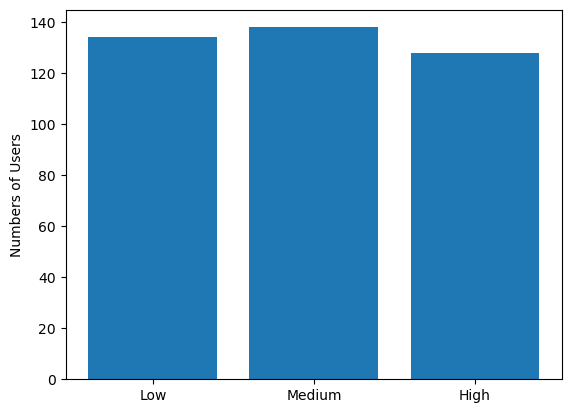

In [22]:
plt.bar(age_cat.index.values, age_cat['Age'])
plt.ylabel('Numbers of Users')
plt.show()


# MODEL BUILDING

In [25]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

In [30]:
# split data into features and target

x = data[['Gender', 'Age', 'EstimatedSalary']]
y=data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

In [32]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [33]:
y_pred = classifier.predict(x_test)

In [35]:
from sklearn import metrics

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))

Accuracy:  0.925
Precision:  0.975
Recall:  0.8297872340425532


In [37]:
#calculate ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print ('ROC AUC', roc_auc)

ROC AUC 0.9080443019527833


In [39]:
#plot confusion matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

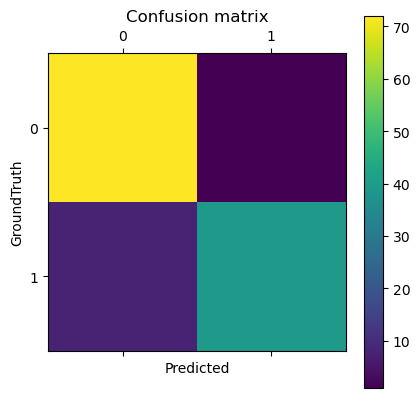

[[72  1]
 [ 8 39]]


In [40]:
conftable(y_test,y_pred,'conf')

In [41]:
# Ground Truth
pd.Series(y_test).value_counts()

0    73
1    47
Name: Purchased, dtype: int64

In [43]:
# Read about accuracy, precision,recall, confusionmatrix and regression tasks